# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [68]:
# Description of the data problem
data_problem_description = "To transform the task into a data problem, I aim to employ predictive modeling to uncover the determinants of used car prices. This involves analyzing a dataset featuring information on 426,000 used cars to pinpoint the key factors that affect pricing. Utilizing machine learning techniques, I plan to develop a model capable of accurately predicting car prices based on attributes such as year, mileage, make, model, condition, and others. The goal is to provide my client, a used car dealership, with actionable insights into the factors that influence consumer preferences and perceived value in the used car market."

In [69]:
print(data_problem_description)

To transform the task into a data problem, I aim to employ predictive modeling to uncover the determinants of used car prices. This involves analyzing a dataset featuring information on 426,000 used cars to pinpoint the key factors that affect pricing. Utilizing machine learning techniques, I plan to develop a model capable of accurately predicting car prices based on attributes such as year, mileage, make, model, condition, and others. The goal is to provide my client, a used car dealership, with actionable insights into the factors that influence consumer preferences and perceived value in the used car market.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('data/vehicles.csv')

In [5]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [6]:
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [8]:
# Checks for missing values in each column
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [9]:
# Creates a copy of the original dataset
data_cleaned = data.copy()

In [10]:
# Drops unnecessary columns
data_cleaned.drop(columns=['VIN', 'size', 'id', 'region', 'cylinders'], inplace=True)

In [11]:
# Imputes categorical columns
cat_columns = ['manufacturer', 'model', 'fuel', 'title_status', 'transmission']
for col in cat_columns:
    data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)

In [12]:
# Imputes numerical columns
data_cleaned['year'].fillna(data['year'].median(), inplace=True)
data_cleaned['odometer'].fillna(data['odometer'].mean(), inplace=True)

In [13]:
data_cleaned = data_cleaned.dropna()

In [14]:
# Checks to see if there are any remaining missing values
missing_values = data_cleaned.isnull().sum()
print("Missing Values after handling:")
print(missing_values)

Missing Values after handling:
price           0
year            0
manufacturer    0
model           0
condition       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64


In [15]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150855 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         150855 non-null  int64  
 1   year          150855 non-null  float64
 2   manufacturer  150855 non-null  object 
 3   model         150855 non-null  object 
 4   condition     150855 non-null  object 
 5   fuel          150855 non-null  object 
 6   odometer      150855 non-null  float64
 7   title_status  150855 non-null  object 
 8   transmission  150855 non-null  object 
 9   drive         150855 non-null  object 
 10  type          150855 non-null  object 
 11  paint_color   150855 non-null  object 
 12  state         150855 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 16.1+ MB


In [16]:
# Defines a function to remove outliers by IQR within each group
def remove_outliers_by_group(df, group_column, target_column, threshold=1.5):
    df_cleaned = pd.DataFrame()
    for group, data in df.groupby(group_column):
        Q1 = data[target_column].quantile(0.25)
        Q3 = data[target_column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        cleaned_data = data[(data[target_column] >= lower_bound) & (data[target_column] <= upper_bound)]
        df_cleaned = pd.concat([df_cleaned, cleaned_data])
    return df_cleaned

# Removes the outliers in 'price' column within each 'manufacturer' group
data_cleaned = remove_outliers_by_group(data_cleaned, 'manufacturer', 'price')

# Checks the shape of the cleaned dataset
print("Shape of cleaned dataset:", data_cleaned.shape)

Shape of cleaned dataset: (148364, 13)


In [17]:
# Calculates Q1, Q3, and IQR for year, age, and odometer
Q1_year = data_cleaned['year'].quantile(0.25)
Q3_year = data_cleaned['year'].quantile(0.75)
IQR_year = Q3_year - Q1_year

Q1_odometer = data_cleaned['odometer'].quantile(0.25)
Q3_odometer = data_cleaned['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer

In [18]:
# Defines lower and upper bounds
lower_bound_year = Q1_year - 1.5 * IQR_year
upper_bound_year = Q3_year + 1.5 * IQR_year

lower_bound_odometer = Q1_odometer - 1.5 * IQR_odometer
upper_bound_odometer = Q3_odometer + 1.5 * IQR_odometer

In [19]:
# Filters dataframe to remove outliers
data_cleaned = data_cleaned[(data_cleaned['year'] >= lower_bound_year) & (data_cleaned['year'] <= upper_bound_year)]
data_cleaned = data_cleaned[(data_cleaned['odometer'] >= lower_bound_odometer) & (data_cleaned['odometer'] <= upper_bound_odometer)]

In [20]:
# Resets index
data_cleaned.reset_index(drop=True, inplace=True)

In [21]:
# Defines a function to plot histograms
def plot_histograms(df, columns, titles, bins=20):
    fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(15, 5))
    for i, column in enumerate(columns):
        ax = axes[i]
        ax.hist(df[column], bins=bins)
        ax.set_title(titles[i])
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

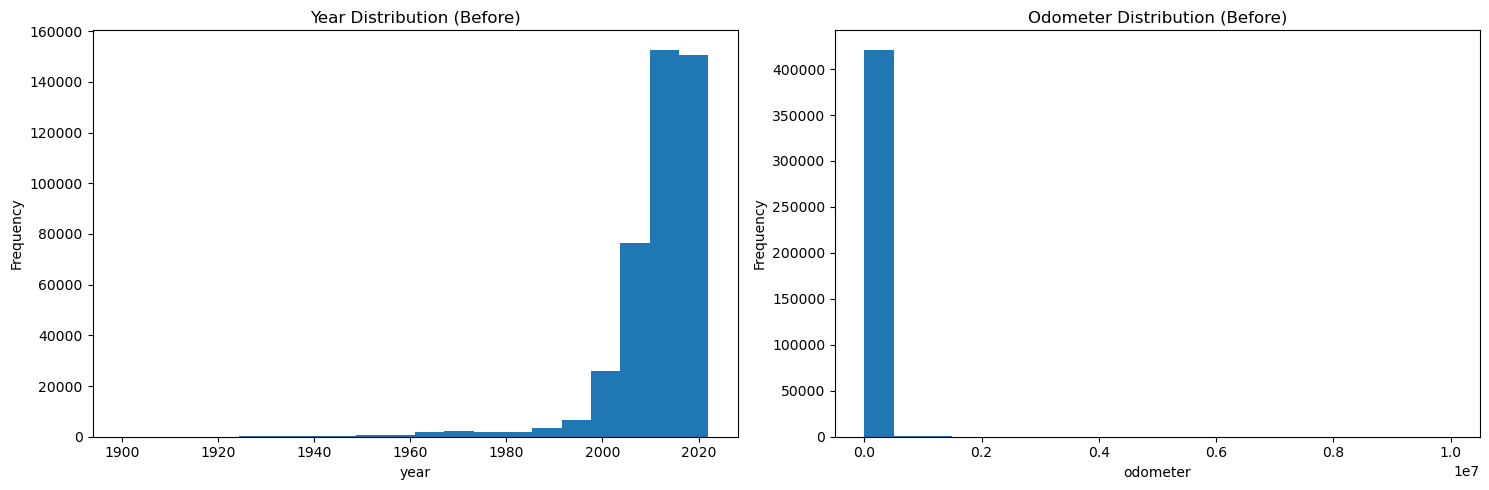

In [22]:
# Shows distribution before removing outliers
plot_histograms(data, ['year', 'odometer'], ['Year Distribution (Before)', 'Odometer Distribution (Before)'])


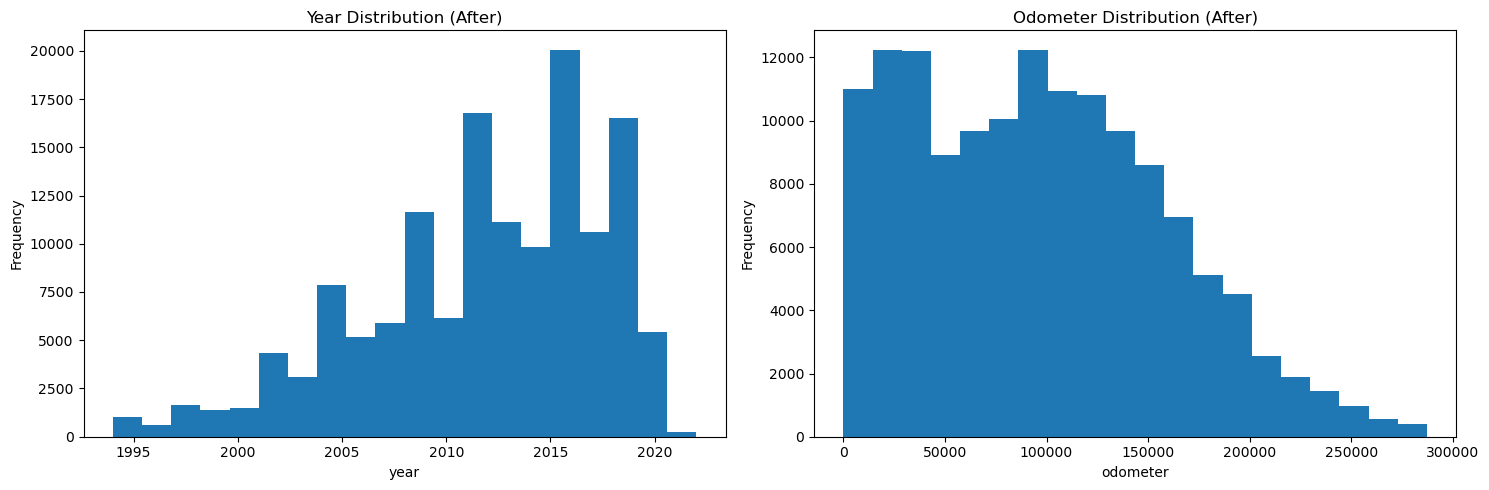

In [23]:
# Shows distribution after removing outliers
plot_histograms(data_cleaned, ['year', 'odometer'], ['Year Distribution (After)', 'Odometer Distribution (After)'])

In [24]:
# Calculates age of the car
data_cleaned['age'] = 2024 - data_cleaned['year']

In [25]:
# Checks the updated dataframe
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140788 entries, 0 to 140787
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         140788 non-null  int64  
 1   year          140788 non-null  float64
 2   manufacturer  140788 non-null  object 
 3   model         140788 non-null  object 
 4   condition     140788 non-null  object 
 5   fuel          140788 non-null  object 
 6   odometer      140788 non-null  float64
 7   title_status  140788 non-null  object 
 8   transmission  140788 non-null  object 
 9   drive         140788 non-null  object 
 10  type          140788 non-null  object 
 11  paint_color   140788 non-null  object 
 12  state         140788 non-null  object 
 13  age           140788 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 15.0+ MB
None


In [26]:
data_cleaned.describe()

,price,year,odometer,age
count,140788.000000,140788.000000,140788.000000,140788.000000
mean,16015.482484,2011.753409,96911.718536,12.246591
std,12236.268546,5.685827,61918.755054,5.685827
min,0.000000,1994.000000,0.000000,2.000000
25%,6299.000000,2008.000000,42763.000000,8.000000
50%,12995.000000,2013.000000,95000.000000,11.000000
75%,23995.000000,2016.000000,140000.000000,16.000000
max,169999.000000,2022.000000,287240.000000,30.000000


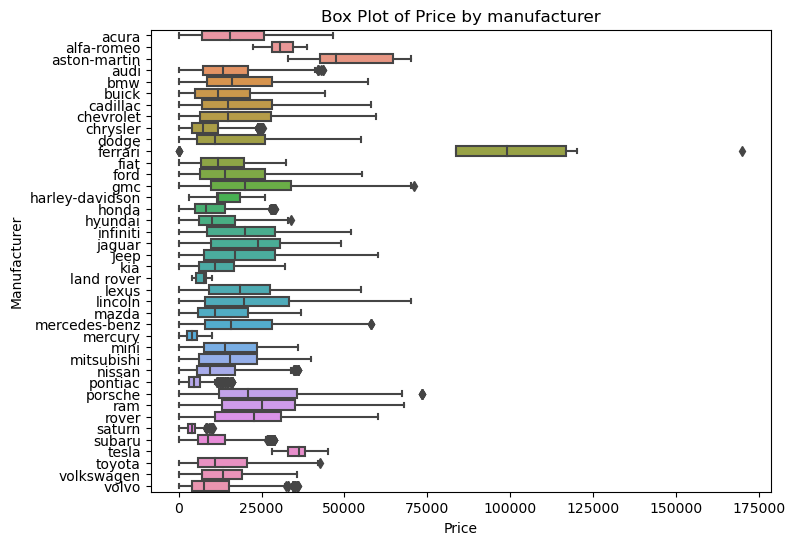

In [27]:
# Box plot for price by manufacturer
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_cleaned['price'], y=data_cleaned['manufacturer'])
plt.title('Box Plot of Price by manufacturer')
plt.xlabel('Price')
plt.ylabel('Manufacturer')
plt.show()

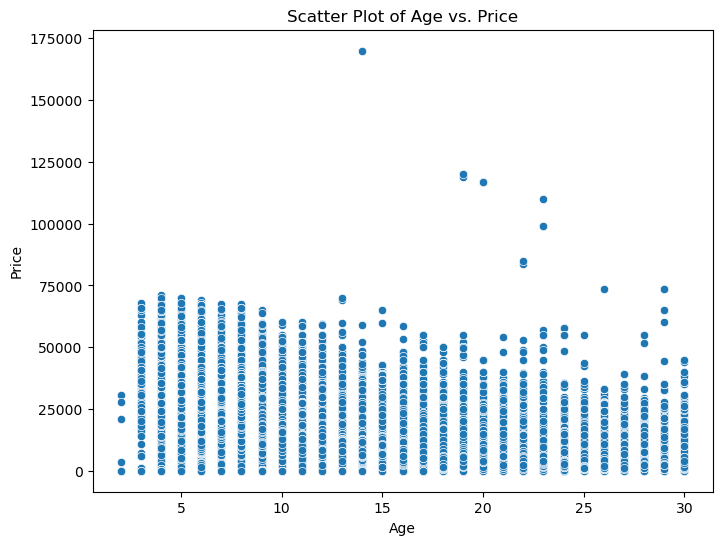

In [28]:
# Scatter plot of age vs. price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='price', data=data_cleaned)
plt.title('Scatter Plot of Age vs. Price')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

/Users/rileychisholm/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/jc/598nxw3x6rxcvsd9jn6h8b3w0000gn/T/ipykernel_17813/648543905.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


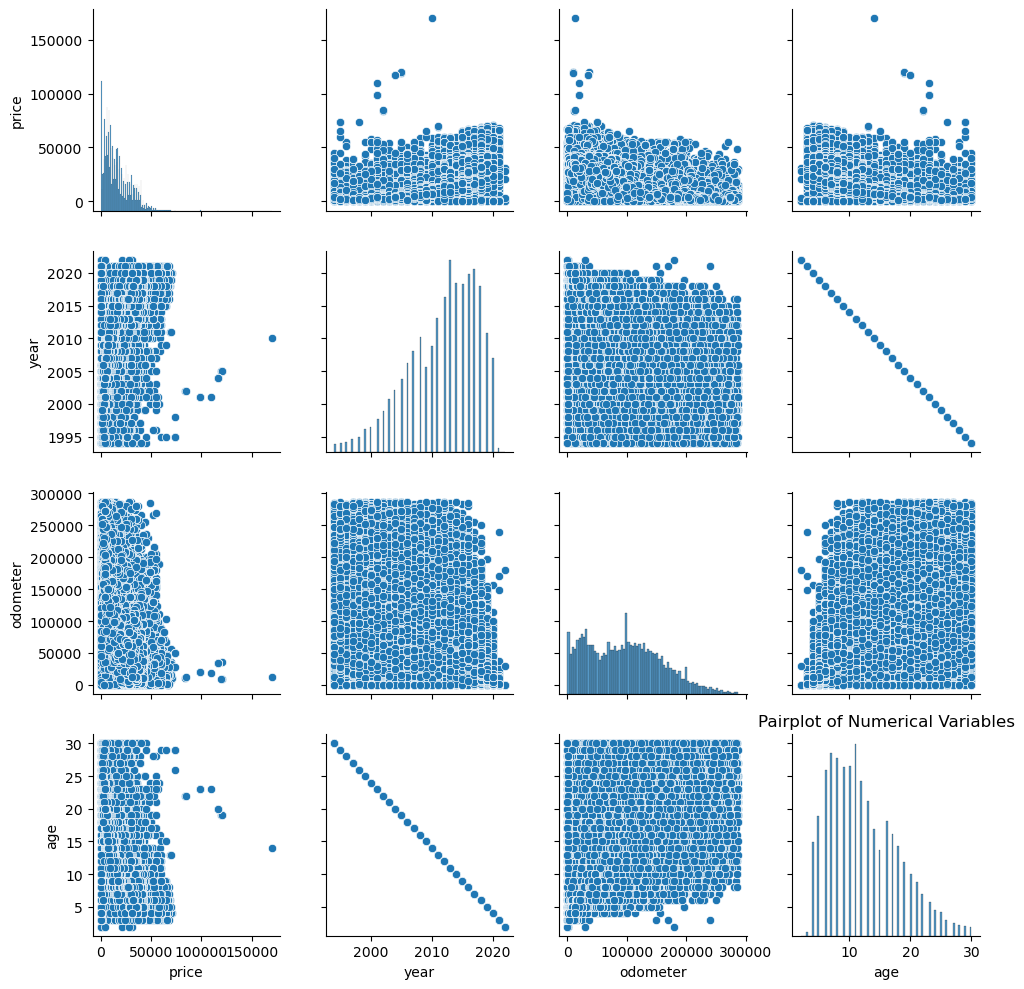

In [29]:
# Pairplot
sns.pairplot(data_cleaned[['price', 'year', 'odometer', 'age']])
plt.title('Pairplot of Numerical Variables')
plt.tight_layout()
plt.show()

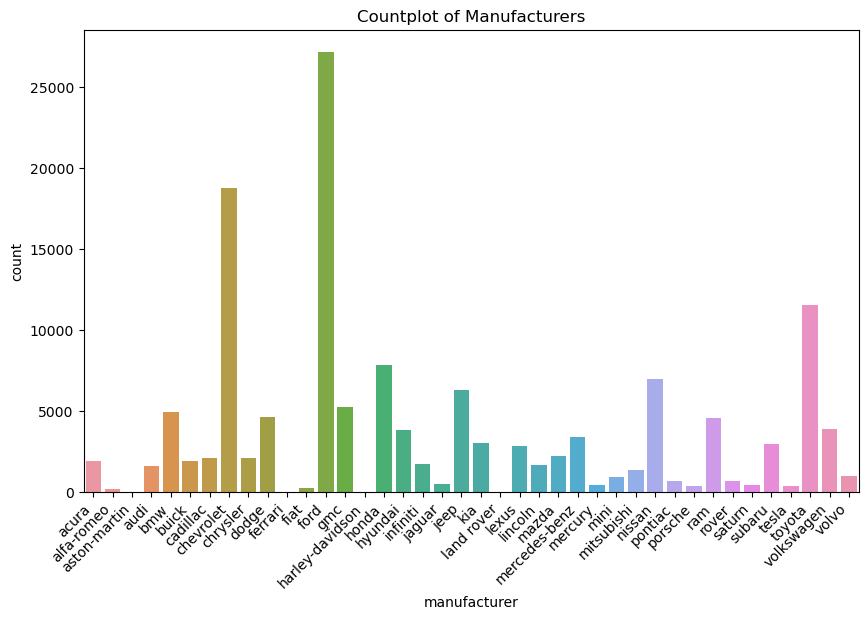

In [30]:
# Countplot of manufacturers
plt.figure(figsize=(10, 6))
sns.countplot(x='manufacturer', data=data_cleaned)
plt.title('Countplot of Manufacturers')
plt.xticks(rotation=45, ha='right')
plt.show()

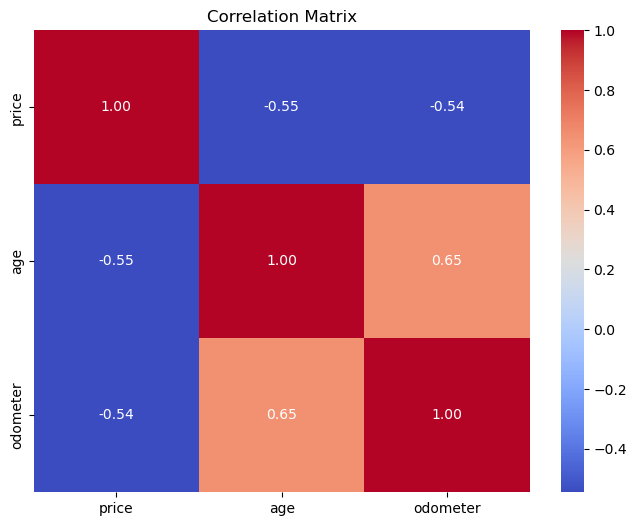

In [31]:
# Calculates correlation matrix
correlation_matrix = data_cleaned[['price', 'age', 'odometer']].corr()

# Visualizes correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [32]:
# Creates a copy of the original dataset
data_encoded = data_cleaned.copy()

In [33]:
# Converts categorical columns to numerical using one-hot encoding
data_encoded = pd.get_dummies(data_cleaned, columns=['fuel', 'transmission', 'type', 'drive', 'condition'], drop_first=True)

In [34]:
# Instantiates LabelEncoder
label_encoder = LabelEncoder()

In [35]:
# Fits and transforms the categorical variable
numerical_variable = label_encoder.fit_transform(data_encoded['manufacturer'])

In [36]:
# Replaces the original column with the numerical values
data_encoded['numerical_manufacturer'] = numerical_variable

In [37]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140788 entries, 0 to 140787
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   price                   140788 non-null  int64  
 1   year                    140788 non-null  float64
 2   manufacturer            140788 non-null  object 
 3   model                   140788 non-null  object 
 4   odometer                140788 non-null  float64
 5   title_status            140788 non-null  object 
 6   paint_color             140788 non-null  object 
 7   state                   140788 non-null  object 
 8   age                     140788 non-null  float64
 9   fuel_electric           140788 non-null  bool   
 10  fuel_gas                140788 non-null  bool   
 11  fuel_hybrid             140788 non-null  bool   
 12  fuel_other              140788 non-null  bool   
 13  transmission_manual     140788 non-null  bool   
 14  transmission_other  

In [38]:
# Drops unnecessary columns
data_encoded.drop(columns=['manufacturer', 'state', 'title_status', 'model', 'paint_color'], inplace=True)

In [39]:
data_encoded.head()

,price,year,odometer,age,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,transmission_manual,transmission_other,...,type_van,type_wagon,drive_fwd,drive_rwd,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,numerical_manufacturer
0,28000,2018.0,55000.0,6.0,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,0
1,3500,2008.0,242000.0,16.0,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,0
2,27500,2018.0,21115.0,6.0,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,0
3,10500,2010.0,173000.0,14.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
4,42990,2020.0,3207.0,4.0,False,False,False,True,False,True,...,False,False,True,False,False,True,False,False,False,0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [40]:
# Separates features (X) and target variable (y)
X = data_encoded.drop(columns=['price'])
y = data_encoded['price']

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [42]:
# Initializes StandardScaler
scaler = StandardScaler()

In [43]:
# Fits the scaler to the training data and transforms both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Defines models
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()

In [45]:
# Performs Sequential Feature Selection (SFS)
sfs = SequentialFeatureSelector(linear_model, n_features_to_select=8)
sfs.fit(X_train_scaled, y_train)
selected_features_sfs = X_train.columns[sfs.get_support()]

In [46]:
# Reduces X_train and X_test to selected features
X_train_sfs = sfs.transform(X_train_scaled)
X_test_sfs = sfs.transform(X_test_scaled)

In [47]:
# Defines parameter grids for Ridge and Lasso
ridge_params = {'alpha': [0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.1, 1, 10, 100]}

In [48]:
# Performs Grid Search for Ridge and Lasso
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid = GridSearchCV(lasso_model, lasso_params, cv=5, scoring='neg_mean_squared_error')

In [49]:
ridge_grid.fit(X_train_sfs, y_train)
lasso_grid.fit(X_train_sfs, y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [50]:
print("Ridge Best Parameters:", ridge_grid.best_params_)
print("Lasso Best Parameters:", lasso_grid.best_params_)

Ridge Best Parameters: {'alpha': 10}
Lasso Best Parameters: {'alpha': 0.1}


In [51]:
# Trains models with selected features and best parameters
ridge_model.set_params(**ridge_grid.best_params_)
lasso_model.set_params(**lasso_grid.best_params_)

Lasso(alpha=0.1)

In [52]:
ridge_model.fit(X_train_sfs, y_train)
lasso_model.fit(X_train_sfs, y_train)
linear_model.fit(X_train_sfs, y_train)

LinearRegression()

In [53]:
# Coefficients for Linear Regression
linear_coefficients = linear_model.coef_
# Coefficients for Ridge Regression
ridge_coefficients = ridge_model.coef_
# Coefficients for Lasso Regression
lasso_coefficients = lasso_model.coef_

print("Linear Regression coefficients:", linear_coefficients)
print("Ridge Regression coefficients:", ridge_coefficients)
print("Lasso Regression coefficients:", lasso_coefficients)
print("Selected Features:", selected_features_sfs)

Linear Regression coefficients: [ 3794.53568524 -3486.87156157 -2297.30774785 -1271.12473904
  2416.56382214  1553.59530262  1898.06147134 -3224.06756158]
Ridge Regression coefficients: [ 3794.25481861 -3486.64476215 -2296.79725248 -1270.52370768
  2416.44625161  1553.53443031  1897.99741987 -3223.76305783]
Lasso Regression coefficients: [ 3794.48471663 -3486.79190614 -2297.04842681 -1270.79675711
  2416.46854288  1553.51706531  1898.00506123 -3224.0060725 ]
Selected Features: Index(['year', 'odometer', 'fuel_gas', 'fuel_other', 'transmission_other',
       'type_pickup', 'type_truck', 'drive_fwd'],
      dtype='object')


In [54]:
# Evaluates models using cross-validation
linear_cv_scores = cross_val_score(linear_model, X_train_sfs, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_cv_scores = cross_val_score(ridge_model, X_train_sfs, y_train, cv=5, scoring='neg_mean_squared_error')
lasso_cv_scores = cross_val_score(lasso_model, X_train_sfs, y_train, cv=5, scoring='neg_mean_squared_error')

In [55]:
# Calculates mean squared errors
mse_linear_cv = linear_cv_scores.mean()
mse_ridge_cv = ridge_cv_scores.mean()
mse_lasso_cv = lasso_cv_scores.mean()

In [56]:
# Stores the results in a DataFrame
results = {
    "Model": ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    "Training MSE": [mean_squared_error(y_train, linear_model.predict(X_train_sfs)), mean_squared_error(y_train, ridge_model.predict(X_train_sfs)), mean_squared_error(y_train, lasso_model.predict(X_train_sfs))],
    "Test MSE": [mean_squared_error(y_test, linear_model.predict(X_test_sfs)), mean_squared_error(y_test, ridge_model.predict(X_test_sfs)), mean_squared_error(y_test, lasso_model.predict(X_test_sfs))],
    "CV MSE": [mse_linear_cv, mse_ridge_cv, mse_lasso_cv]
}

results_df = pd.DataFrame(results)
print(results_df)

               Model  Training MSE      Test MSE        CV MSE
0  Linear Regression  6.358039e+07  6.335301e+07 -6.360594e+07
1   Ridge Regression  6.358039e+07  6.335309e+07 -6.360593e+07
2   Lasso Regression  6.358039e+07  6.335306e+07 -6.360594e+07


In [58]:
# Makes predictions on the test
y_test_pred_linear = linear_model.predict(X_test_sfs)
y_test_pred_ridge = ridge_model.predict(X_test_sfs)
y_test_pred_lasso = lasso_model.predict(X_test_sfs)

In [59]:
# Computes R-squared
r2_linear = r2_score(y_test, y_test_pred_linear)
r2_ridge = r2_score(y_test, y_test_pred_ridge)
r2_lasso = r2_score(y_test, y_test_pred_lasso)

In [60]:
# Computes MAE
mae_linear = mean_absolute_error(y_test, y_test_pred_linear)
mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
mae_lasso = mean_absolute_error(y_test, y_test_pred_lasso)

In [61]:
print("R-squared:")
print("Linear Regression:", r2_linear)
print("Ridge Regression:", r2_ridge)
print("Lasso Regression:", r2_lasso)
print("\nMean Absolute Error:")
print("Linear Regression:", mae_linear)
print("Ridge Regression:", mae_ridge)
print("Lasso Regression:", mae_lasso)

R-squared:
Linear Regression: 0.5758547001049559
Ridge Regression: 0.575854182602946
Lasso Regression: 0.5758543666297975

Mean Absolute Error:
Linear Regression: 5545.331674478353
Ridge Regression: 5545.304539153751
Lasso Regression: 5545.323146973897


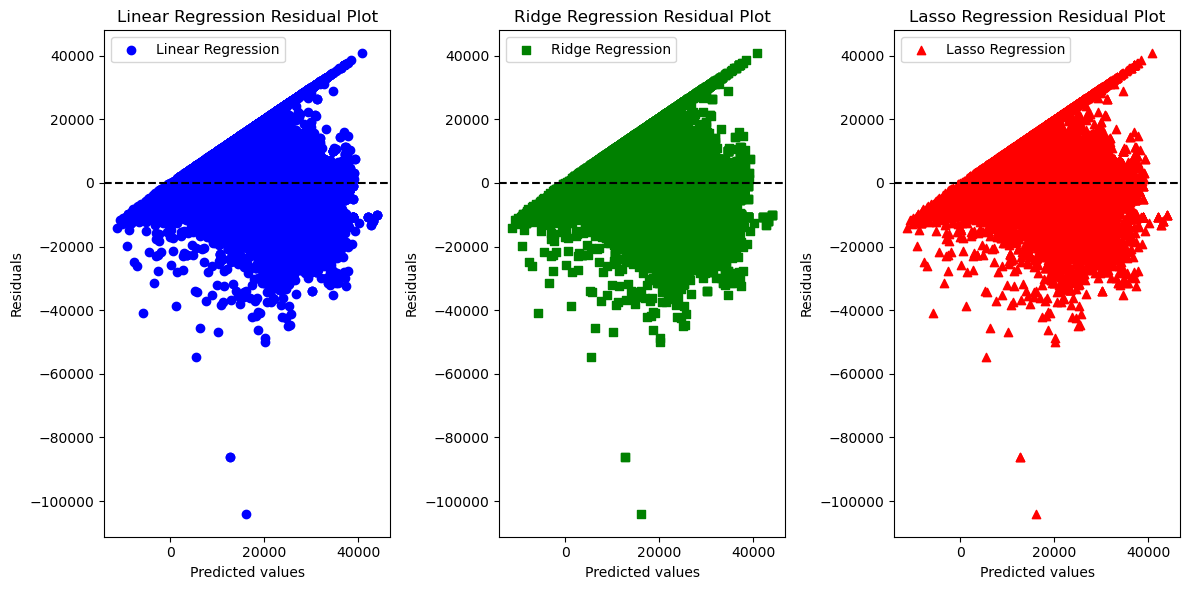

In [62]:
# Residual plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.scatter(y_test_pred_linear, y_test_pred_linear - y_test, c='blue', marker='o', label='Linear Regression')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Linear Regression Residual Plot')
plt.axhline(y=0, color='k', linestyle='--')
plt.legend(loc='upper left')

plt.subplot(1, 3, 2)
plt.scatter(y_test_pred_ridge, y_test_pred_ridge - y_test, c='green', marker='s', label='Ridge Regression')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Ridge Regression Residual Plot')
plt.axhline(y=0, color='k', linestyle='--')
plt.legend(loc='upper left')

plt.subplot(1, 3, 3)
plt.scatter(y_test_pred_lasso, y_test_pred_lasso - y_test, c='red', marker='^', label='Lasso Regression')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Lasso Regression Residual Plot')
plt.axhline(y=0, color='k', linestyle='--')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

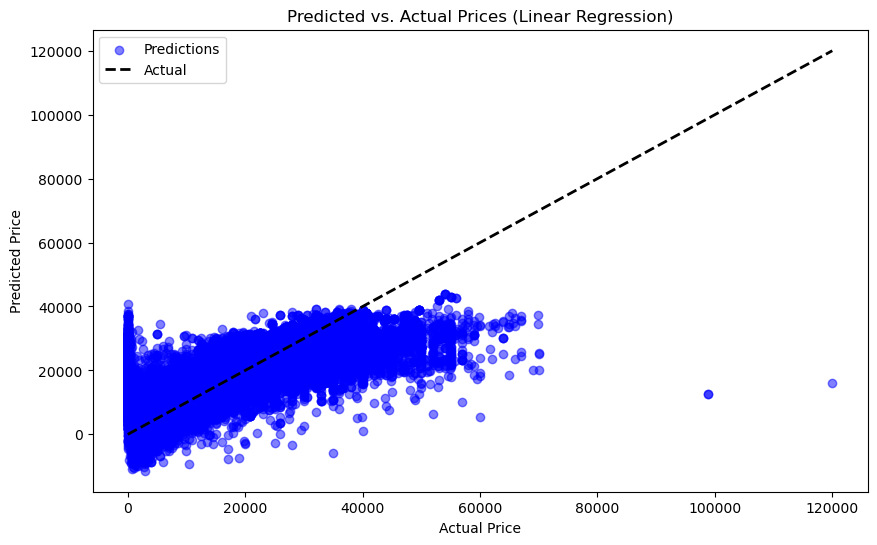

In [63]:
# Scatter plot of predicted vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_linear, color='blue', alpha=0.5, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Actual')
plt.title('Predicted vs. Actual Prices (Linear Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [70]:
data_evaluation = """To evaluate the model and reflect on my findings, I initially reframed the business problem of predicting used car prices as a data challenge, utilizing predictive modeling to identify key determinants. The process began with a thorough exploration of the dataset, addressing data quality concerns, and understanding its contents through summary statistics and visualizations.

After preparing the dataset by handling missing values and outliers, I constructed multiple regression models including Linear, Ridge, and Lasso Regression. I used Sequential Feature Selection (SFS) to pinpoint relevant features and grid search for tuning hyperparameters, then evaluated model performance through cross-validation.

The results showed comparable performance among the models, with Ridge and Lasso Regression slightly outperforming Linear Regression in terms of mean squared error (MSE), though the differences were minimal. All models explained approximately 57% of the variance in the target variable. Visual analysis through residual plots and scatter plots of predicted versus actual prices confirmed the models' capability to make unbiased predictions."""

In [71]:
print(data_evaluation)

To evaluate the model and reflect on my findings, I initially reframed the business problem of predicting used car prices as a data challenge, utilizing predictive modeling to identify key determinants. The process began with a thorough exploration of the dataset, addressing data quality concerns, and understanding its contents through summary statistics and visualizations.

After preparing the dataset by handling missing values and outliers, I constructed multiple regression models including Linear, Ridge, and Lasso Regression. I used Sequential Feature Selection (SFS) to pinpoint relevant features and grid search for tuning hyperparameters, then evaluated model performance through cross-validation.

The results showed comparable performance among the models, with Ridge and Lasso Regression slightly outperforming Linear Regression in terms of mean squared error (MSE), though the differences were minimal. All models explained approximately 57% of the variance in the target variable. Vi

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.